In [1]:
import itertools as it
from iterdub import iterdub as ib
from iterpop import iterpop as ip
from keyname import keyname as kn
from matplotlib import pyplot as plt
import matplotlib
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import patchworklib as pw
import pathlib
import random
from scipy import stats
import seaborn as sns
from slugify import slugify
import statsmodels.api as sm
import statsmodels.formula.api as smf
from teeplot import teeplot as tp
from tqdm import tqdm


<Figure size 72x72 with 0 Axes>

In [2]:
np.random.seed(1)
random.seed(1)


In [3]:
from conduitpylib.viz import _get_defaults as cfg
from conduitpylib.viz import (
    get_notomoji_font_path,
    performance_semantics_scatterplot,
    performance_semantics_facetplot,
)
from conduitpylib.wrangle import retrieve_and_prepare_delta_dataframes
from _rename_allocation import rename_allocation


In [4]:
nbm.print_metadata()


context: ci
hostname: 6709ec360139
interpreter: 3.8.10 (default, May 26 2023, 14:05:08)  [GCC 9.4.0]
nbcellexec: 4
nbname: a=performance_semantics+what=lac-417+compute-work=0+simels_per_cpu=2048+ext=
nbpath: /opt/conduit/binder/date=2021+project=72k5n/a=with-lac-417-vs-sans-lac-417/a=performance_semantics+what=lac-417+compute-work=0+simels_per_cpu=2048+ext=.ipynb
revision: null
session: a0619673-caa9-43a6-b87a-c4d6f04e2b35
timestamp: 2023-11-18T23:30:29Z00:00


IPython==7.16.1
keyname==0.5.3
yaml==5.4.1
iterdub==0.2.0
iterpop==0.3.4
matplotlib==3.5.2
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.1.2
patchworklib==0.6.3
scipy==1.5.4
seaborn==0.13.0
statsmodels==0.12.2
teeplot==0.6.1
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.2.1
json==2.0.9
six==1.15.0
ipykernel==5.5.3


# Get Data


In [5]:
longitudinal, snapshot = retrieve_and_prepare_delta_dataframes(
    df_inlet_url="https://osf.io/jgpnv/download",
    df_outlet_url="https://osf.io/ncdfq/download",
    treatment_column="Allocation",
)


a: df_inlet
digest: f5e773e930982d7a2fa6fe51fcbaaee0d1b08a120f140662bc07d0d537da37d3
num cols: 45
num cols all na: 2
num cols any na: 2
num na: 133120
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 62M

a: df_outlet
digest: ce7c97600d27e972d19d35c0e30021716f4f553dab5763d3c29bf5010f75b8cb
num cols: 71
num cols all na: 6
num cols any na: 6
num na: 399360
num rows: 66560
num rows all na: 0
num rows any na: 66560
size: 75M



100%|██████████| 256/256 [00:03<00:00, 77.95it/s]


teeplots/./allocation=sans-lac-417+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


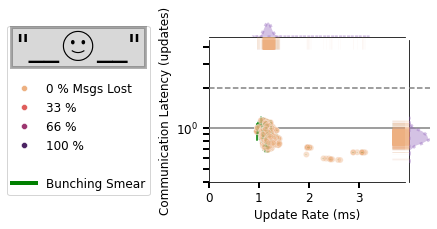

100%|██████████| 256/256 [00:03<00:00, 80.65it/s]


teeplots/./allocation=with-lac-417+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=with-lac-417+data=longitudinal+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


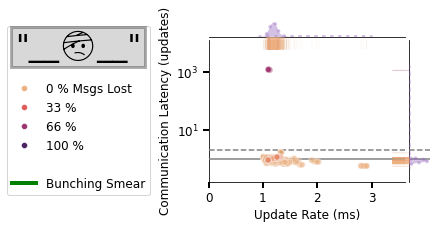

100%|██████████| 1536/1536 [00:23<00:00, 65.89it/s]


teeplots/./allocation=sans-lac-417+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=sans-lac-417+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


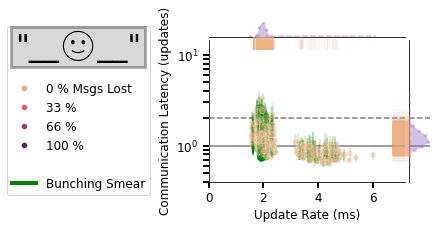

100%|██████████| 1536/1536 [00:21<00:00, 72.75it/s]


teeplots/./allocation=with-lac-417+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=with-lac-417+data=snapshot+heat=msgs-lost+title=+viz=performance-semantics-scatterplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


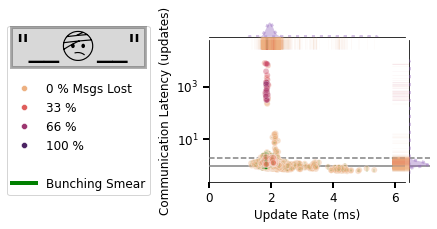

In [6]:
for data in "longitudinal", "snapshot":
    for allocation, group in eval(data).groupby("Allocation"):
        group_df = group.reset_index()
        tp.tee(
            performance_semantics_scatterplot,
            data=rename_allocation(group_df),
            x="Simstep Period Inlet (ns)",
            y="Latency Simsteps Inlet",
            heat="% Msgs Lost",
            legend_font_name=get_notomoji_font_path(),
            title="__{}__".format(
                {
                    "With lac-417": "🤕",
                    "Sans lac-417": "🙂",
                }[allocation]
            ),
            batch_kwargs={
                "batch_size": 10,
                "progress_apply": tqdm,
            },
            bunching_smear_alpha=0.2,
            scatter_kwargs={
                "alpha": 0.4,
            },
            teeplot_outattrs={
                "allocation": slugify(allocation),
                "data": slugify(data),
            },
        )
        plt.show()


teeplots/./allocation=with-lac-417+data=longitudinal+hue=allocation+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=with-lac-417+data=longitudinal+hue=allocation+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


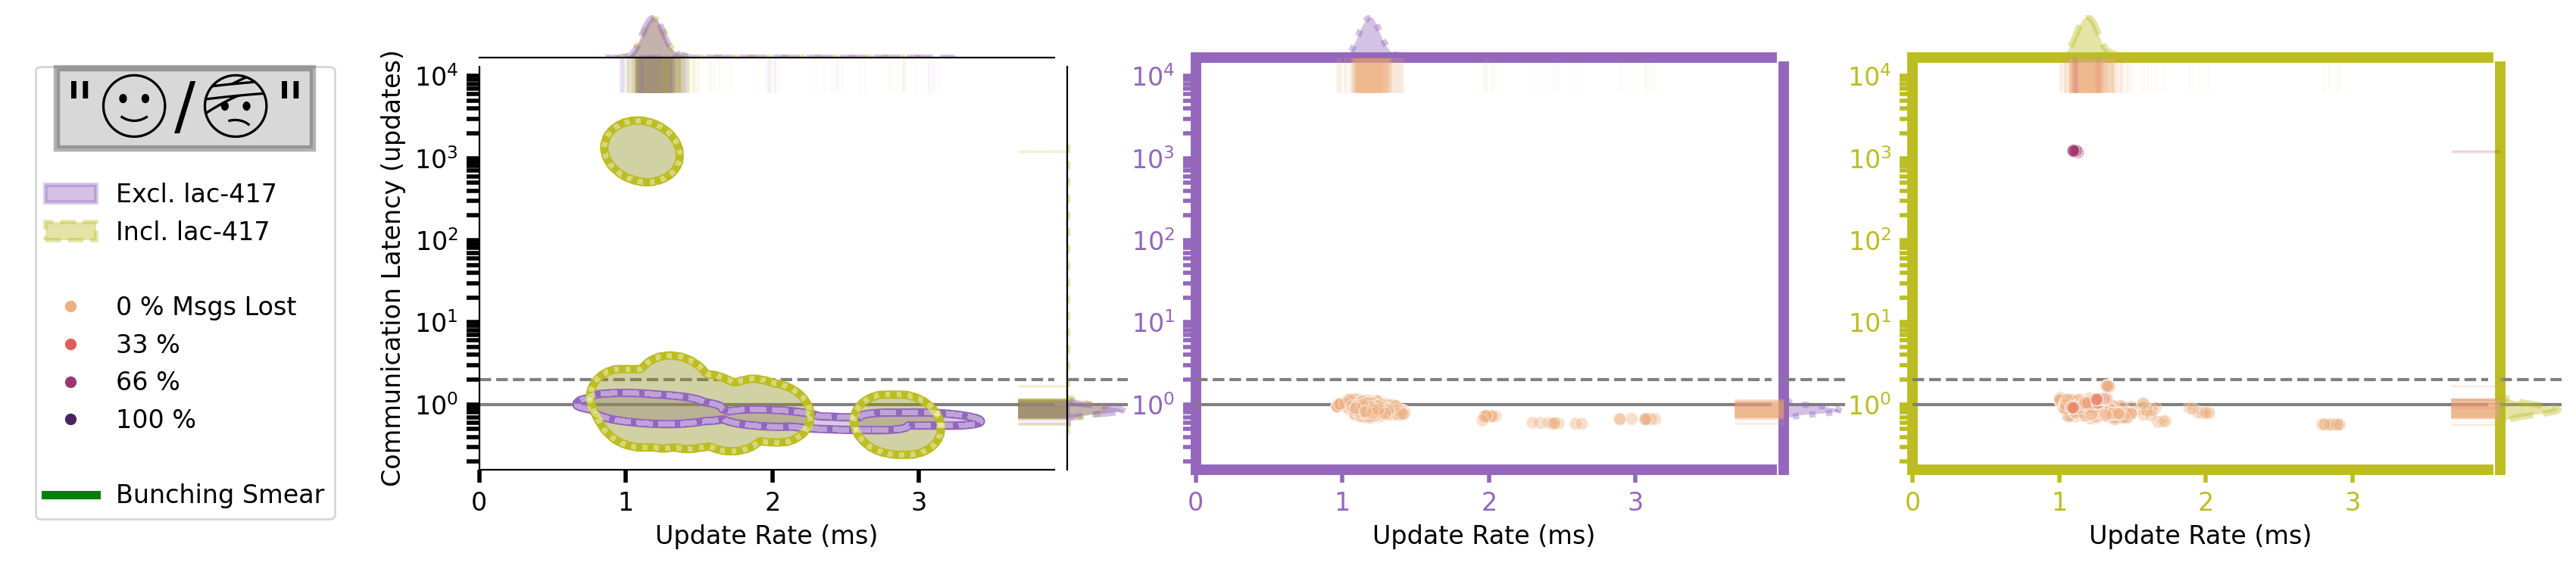

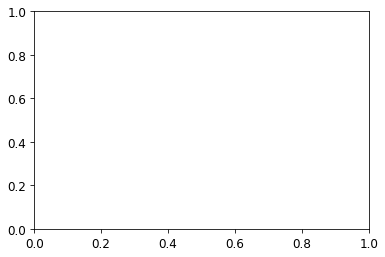

teeplots/./allocation=with-lac-417+data=snapshot+hue=allocation+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.pdf
skipping teeplots/./allocation=with-lac-417+data=snapshot+hue=allocation+title=+viz=performance-semantics-facetplot+x=simstep-period-inlet-ns+y=latency-simsteps-inlet+ext=.png


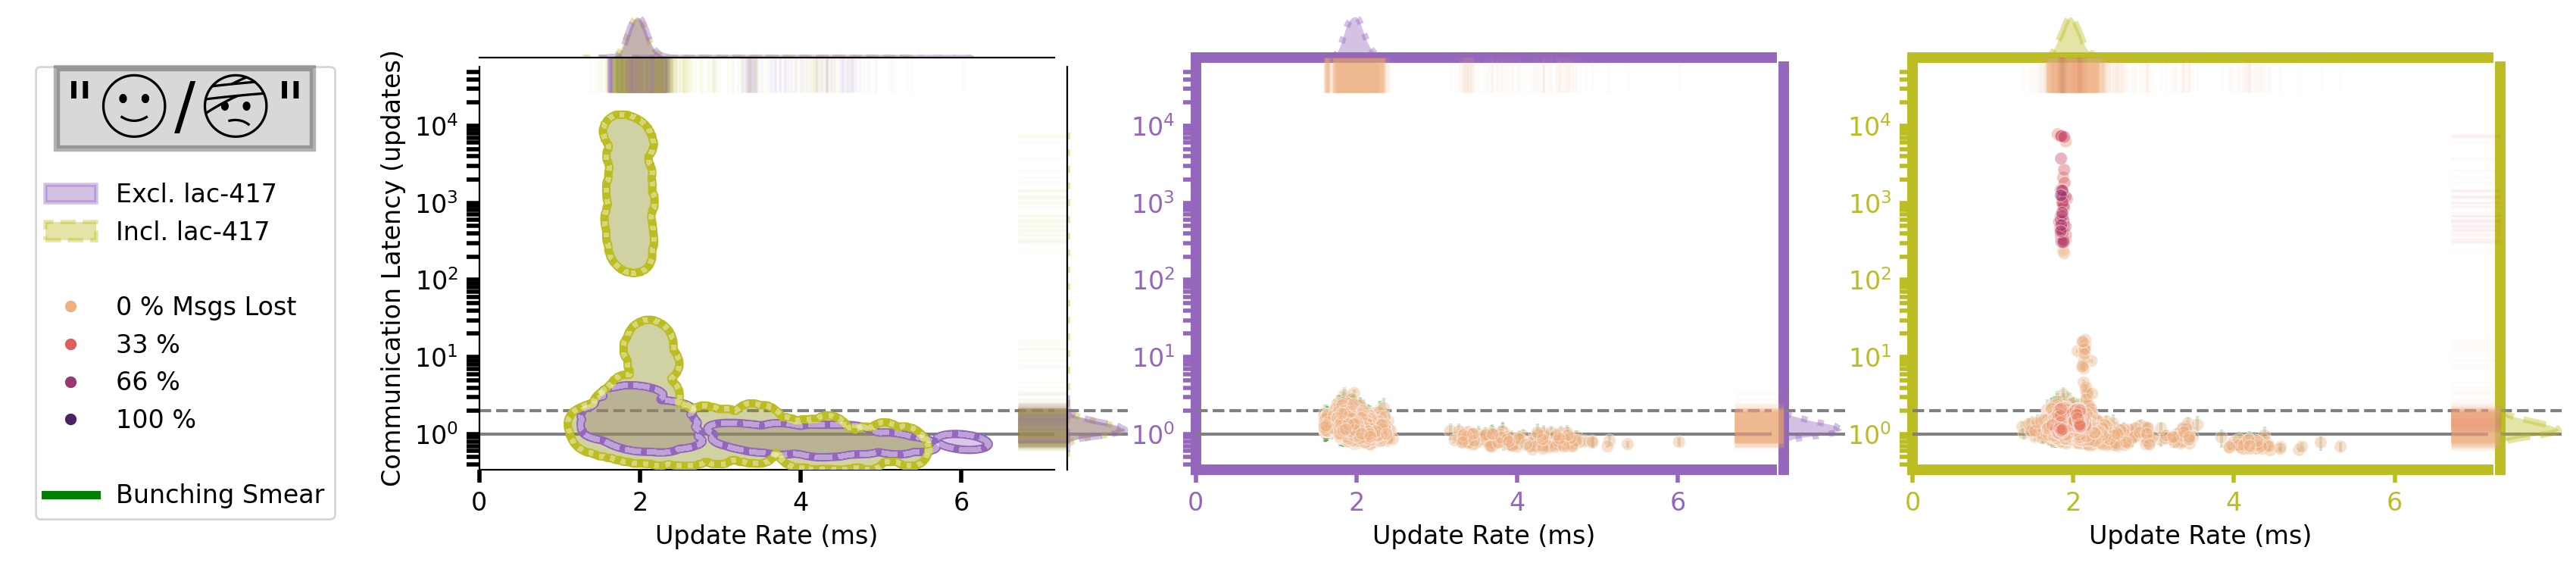

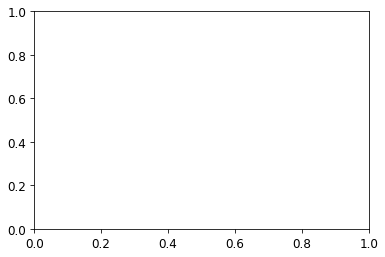

In [7]:
for data in "longitudinal", "snapshot":
    plt.clf()
    group_df = group.reset_index()
    with pw.patched_axisgrid():
        facetplot = tp.tee(
            performance_semantics_facetplot,
            data=rename_allocation(eval(data)),
            x="Simstep Period Inlet (ns)",
            y="Latency Simsteps Inlet",
            hue="Allocation",
            legend_font_name=get_notomoji_font_path(),
            title="🙂/🤕",
            teeplot_outattrs={
                "allocation": slugify(allocation),
                "data": slugify(data),
            },
        )
        display(facetplot)
        plt.show()
